<a href="https://colab.research.google.com/github/glcn35/PANDAS/blob/main/NBA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dictionary
Tm: The NBA team that drafted a player.
Player: The name of the player.
College: The college an NBA draft pick attended. For international prospects, players who were drafted out of the G-League, and players who were drafted directly out of high school, this column is blank.
Yrs: Years spent in the NBA. NA for players who did not play a single season.
G: Games played in the NBA. NA for players who did not play a single game.
TOTMP: Total minutes played in the NBA. NA for players who did not play a single minute.
TOTPTS: Total points scored in the NBA. NA for players who did not play in the NBA; 0 for players who did but failed to record a point.
TOTTRB: Total rebounds grabbed in the NBA. NA for players who did not play in the NBA; 0 for players who did but failed to record a rebound.
TOTAST: Total assists recorded in the NBA. NA for players who did not play in the NBA; 0 for players who did but failed to record an assist.
FG%: Field goal percentage in the NBA. NA for players who did not play in the NBA
3P%: Three point percentage in the NBA. NA for players who did not play in the NBA
FT%: Free throw percentage in the NBA. NA for players who did not play in the NBA
WS: Win shares in the NBA, using Basketball-Reference's Win Shares. NA for players who did not play in the NBA
WS/48: Win shares in the NBA per 48 minutes, using Basketball-Reference's Win Shares. NA for players who did not play in the NBA
BPM: Box plus-minus in the NBA, using Basketball-Reference. NA for players who did not play in the NBA
VORP Value over replacement player, using Basketball-Reference. NA for players who did not play in the NBA
DraftYr and DraftYear: Duplicate variables for the year a player was drafted.
playerurl: A player's college Sports-Reference statistics page link. NA for players from high school/G-League/international.
MPG, PPG, RPG, APG: Per game statistics computed from totals columns. NA for players who did not play in the NBA.

In [73]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;
warnings.filterwarnings('ignore')

In [74]:
df=pd.read_csv("/content/sample_data/draft-data-20-years.csv")
df

,Team,Player,College,Years,GameTime,Total_Minutes,Total_Points,Total_Rebounds,Total_Assist,Field_Goal%,3P%,FT%,MPG,PPG,RPG,APG,DraftYear
0,CLE,Kyrie Irving,Duke,11.0,596.0,20220.0,13631.0,2279.0,3411.0,469.0,391.0,882.00,33.9,22.9,3.8,5.7,2011
1,MIN,Derrick Williams,Arizona,7.0,428.0,8864.0,3809.0,1693.0,293.0,434.0,0.3,0.71,20.7,8.9,4.0,0.7,2011
2,UTA,Enes Freedom,NaN,11.0,748.0,16101.0,8349.0,5822.0,638.0,548.0,289.0,777.00,21.5,11.2,7.8,0.9,2011
3,CLE,Tristan Thompson,Texas,11.0,707.0,19180.0,6462.0,6011.0,711.0,518.0,278.0,606.00,27.1,9.1,8.5,1.0,2011
4,TOR,Jonas Valančiūnas,NaN,10.0,674.0,17559.0,8958.0,6338.0,771.0,563.0,366.0,784.00,26.1,13.3,9.4,1.1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,CHA,Scottie Lewis,Florida,1.0,2.0,7.0,1.0,0.0,1.0,NaN,NaN,0.50,3.5,0.5,0.0,0.5,2021
656,CHA,Balša Koprivica,Florida State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
657,NYK,Jericho Sims,Texas,1.0,18.0,117.0,19.0,27.0,1.0,727.0,NaN,0.75,6.5,1.1,1.5,0.1,2021
658,BRK,RaiQuan Gray,Florida State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Team            660 non-null    object 
 1   Player          660 non-null    object 
 2   College         533 non-null    object 
 3   Years           595 non-null    float64
 4   GameTime        595 non-null    float64
 5   Total_Minutes   595 non-null    float64
 6   Total_Points    595 non-null    float64
 7   Total_Rebounds  595 non-null    float64
 8   Total_Assist    595 non-null    float64
 9   Field_Goal%     593 non-null    float64
 10  3P%             565 non-null    float64
 11  FT%             580 non-null    float64
 12  MPG             595 non-null    float64
 13  PPG             595 non-null    float64
 14  RPG             595 non-null    float64
 15  APG             595 non-null    float64
 16  DraftYear       660 non-null    int64  
dtypes: float64(13), int64(1), object(3)

In [6]:
df.shape

(660, 17)

In [76]:
df.describe(include=object).T

,count,unique,top,freq
Team,660,30,PHI,48
Player,660,659,Justin Jackson,2
College,533,129,Kentucky,37


In [77]:
df.describe(include=[float,int]).T

,count,mean,std,min,25%,50%,75%,max
Years,595.0,4.080672,2.727873,1.0,2.00,3.0,6.00,11.0
GameTime,595.0,199.764706,188.072587,1.0,47.50,138.0,305.50,748.0
Total_Minutes,595.0,4557.349580,5333.845064,2.0,541.00,2396.0,7131.50,25835.0
Total_Points,595.0,2050.114286,2801.803640,0.0,175.00,832.0,2776.00,17510.0
Total_Rebounds,595.0,844.462185,1188.838268,0.0,87.00,391.0,1146.00,9309.0
Total_Assist,595.0,415.178151,624.325075,0.0,31.00,164.0,515.00,4726.0
Field_Goal%,593.0,391.033541,159.969914,0.0,373.00,425.0,469.00,727.0
3P%,565.0,249.735044,143.852418,0.0,161.00,312.0,353.00,667.0
FT%,580.0,604.947966,291.832689,0.0,582.00,720.0,793.00,915.0
MPG,595.0,17.546218,8.540332,1.0,10.50,17.4,24.25,36.3


In [78]:
df.corr()

,Years,GameTime,Total_Minutes,Total_Points,Total_Rebounds,Total_Assist,Field_Goal%,3P%,FT%,MPG,PPG,RPG,APG,DraftYear
Years,1.000000,0.958859,0.895781,0.807891,0.771585,0.703696,0.177134,0.206327,0.272489,0.570651,0.522152,0.477733,0.348617,-0.605302
GameTime,0.958859,1.000000,0.960490,0.876128,0.835626,0.759868,0.175854,0.205467,0.290073,0.656183,0.606879,0.545487,0.412510,-0.545085
Total_Minutes,0.895781,0.960490,1.000000,0.960553,0.854876,0.842214,0.160839,0.210843,0.272372,0.733184,0.721014,0.584333,0.510465,-0.477289
Total_Points,0.807891,0.876128,0.960553,1.000000,0.814788,0.865092,0.167546,0.209700,0.257812,0.720176,0.794922,0.573843,0.550678,-0.418056
Total_Rebounds,0.771585,0.835626,0.854876,0.814788,1.000000,0.628366,0.194240,0.084667,0.185834,0.599471,0.595689,0.792264,0.333702,-0.412627
Total_Assist,0.703696,0.759868,0.842214,0.865092,0.628366,1.000000,0.077889,0.197585,0.226829,0.662088,0.705252,0.414973,0.764939,-0.355634
Field_Goal%,0.177134,0.175854,0.160839,0.167546,0.194240,0.077889,1.000000,0.068322,0.142555,0.226632,0.232779,0.311143,0.066866,-0.003056
3P%,0.206327,0.205467,0.210843,0.209700,0.084667,0.197585,0.068322,1.000000,0.249432,0.342169,0.325164,0.083516,0.250244,-0.012855
FT%,0.272489,0.290073,0.272372,0.257812,0.185834,0.226829,0.142555,0.249432,1.000000,0.389634,0.357738,0.201293,0.289379,-0.055820
MPG,0.570651,0.656183,0.733184,0.720176,0.599471,0.662088,0.226632,0.342169,0.389634,1.000000,0.918221,0.709517,0.731159,-0.105958


In [79]:
df['DraftYear'].value_counts()

2011    60
2012    60
2013    60
2014    60
2015    60
2016    60
2017    60
2018    60
2019    60
2020    60
2021    60
Name: DraftYear, dtype: int64

In [ ]:
df.head()

,Team,Player,College,Years,GameTime,Total_Minutes,Total_Points,Total_Rebounds,Total_Assist,Field_Goal%,3P%,FT%,MPG,PPG,RPG,APG,DraftYear
0,CLE,Kyrie Irving,Duke,11.0,596.0,20220.0,13631.0,2279.0,3411.0,469.0,391.0,882.00,33.9,22.9,3.8,5.7,2011
1,MIN,Derrick Williams,Arizona,7.0,428.0,8864.0,3809.0,1693.0,293.0,434.0,0.3,0.71,20.7,8.9,4.0,0.7,2011
2,UTA,Enes Freedom,NaN,11.0,748.0,16101.0,8349.0,5822.0,638.0,548.0,289.0,777.00,21.5,11.2,7.8,0.9,2011
3,CLE,Tristan Thompson,Texas,11.0,707.0,19180.0,6462.0,6011.0,711.0,518.0,278.0,606.00,27.1,9.1,8.5,1.0,2011
4,TOR,Jonas Valančiūnas,NaN,10.0,674.0,17559.0,8958.0,6338.0,771.0,563.0,366.0,784.00,26.1,13.3,9.4,1.1,2011


In [ ]:
df.GameTime.sort_values(ascending=False).head()

2     748.0
8     741.0
18    729.0
66    725.0
15    720.0
Name: GameTime, dtype: float64

In [ ]:
df[df.GameTime >= df.GameTime.sort_values(ascending=False).head().values[4]]

,Team,Player,College,Years,GameTime,Total_Minutes,Total_Points,Total_Rebounds,Total_Assist,Field_Goal%,3P%,FT%,MPG,PPG,RPG,APG,DraftYear
2,UTA,Enes Freedom,NaN,11.0,748.0,16101.0,8349.0,5822.0,638.0,548.0,289.00,777.00,21.5,11.2,7.8,0.9,2011
8,CHA,Kemba Walker,UConn,11.0,741.0,24666.0,14414.0,2815.0,3919.0,418.0,0.36,0.84,33.3,19.5,3.8,5.3,2011
15,PHI,Nikola Vučević,USC,11.0,720.0,22214.0,12210.0,7536.0,1990.0,494.0,351.00,756.00,30.9,17.0,10.5,2.8,2011
18,CHA,Tobias Harris,Tennessee,11.0,729.0,22807.0,11970.0,4523.0,1655.0,476.0,366.00,829.00,31.3,16.4,6.2,2.3,2011
66,GSW,Harrison Barnes,UNC,10.0,725.0,23028.0,10235.0,3720.0,1326.0,453.0,0.38,804.00,31.8,14.1,5.1,1.8,2012


In [ ]:
df.isnull().sum()

Team                0
Player              0
College           127
Years              65
GameTime           65
Total_Minutes      65
Total_Points       65
Total_Rebounds     65
Total_Assist       65
Field_Goal%        67
3P%                95
FT%                80
MPG                65
PPG                65
RPG                65
APG                65
DraftYear           0
dtype: int64

In [ ]:
df.columns

Index(['Team', 'Player', 'College', 'Years', 'GameTime', 'Total_Minutes',
       'Total_Points', 'Total_Rebounds', 'Total_Assist', 'Field_Goal%', '3P%',
       'FT%', 'MPG', 'PPG', 'RPG', 'APG', 'DraftYear'],
      dtype='object')

In [ ]:
df['College'].value_counts(dropna=False)

NaN                 127
Kentucky             37
Duke                 28
Kansas               16
UNC                  16
                   ... 
New Mexico State      1
Wake Forest           1
Kansas State          1
Bucknell              1
Western Kentucky      1
Name: College, Length: 130, dtype: int64

In [ ]:
df['College'].fillna('Other',inplace=True)

In [ ]:
df['College'].value_counts(dropna=False)

Other               127
Kentucky             37
Duke                 28
Kansas               16
UNC                  16
                   ... 
New Mexico State      1
Wake Forest           1
Kansas State          1
Bucknell              1
Western Kentucky      1
Name: College, Length: 130, dtype: int64

In [ ]:
df.isnull().sum()

Team               0
Player             0
College            0
Years             65
GameTime          65
Total_Minutes     65
Total_Points      65
Total_Rebounds    65
Total_Assist      65
Field_Goal%       67
3P%               95
FT%               80
MPG               65
PPG               65
RPG               65
APG               65
DraftYear          0
dtype: int64

In [ ]:
df['Years'].value_counts()

2.0     115
1.0     104
3.0      91
4.0      72
5.0      54
6.0      39
7.0      33
8.0      31
9.0      24
10.0     18
11.0     14
Name: Years, dtype: int64

In [9]:
df.columns

Index(['Team', 'Player', 'College', 'Years', 'GameTime', 'Total_Minutes',
       'Total_Points', 'Total_Rebounds', 'Total_Assist', 'Field_Goal%', '3P%',
       'FT%', 'MPG', 'PPG', 'RPG', 'APG', 'DraftYear'],
      dtype='object')

In [19]:
df.groupby('Player')['Total_Points'].sum().sort_values()

Player
İzzet Türkyılmaz             0.0
Colton Iverson               0.0
Nemanja Dangubić             0.0
J.P. Tokoto                  0.0
Nikola Milutinov             0.0
                          ...   
Giannis Antetokounmpo    13762.0
Bradley Beal             14231.0
Anthony Davis            14318.0
Kemba Walker             14414.0
Damian Lillard           17510.0
Name: Total_Points, Length: 659, dtype: float64

In [20]:
df.groupby('Player')['Total_Minutes'].sum().sort_values()

Player
İzzet Türkyılmaz        0.0
Nikola Radičević        0.0
Ognjen Jaramaz          0.0
Olivier Hanlan          0.0
Bojan Dubljević         0.0
                     ...   
Bradley Beal        22418.0
Tobias Harris       22807.0
Harrison Barnes     23028.0
Kemba Walker        24666.0
Damian Lillard      25835.0
Name: Total_Minutes, Length: 659, dtype: float64

In [21]:
df.groupby('Player')['Total_Rebounds'].sum().sort_values()

Player
İzzet Türkyılmaz        0.0
Louis Labeyrie          0.0
Luka Mitrović           0.0
Marcus Denmon           0.0
Marcus Eriksson         0.0
                      ...  
Anthony Davis        6129.0
Jonas Valančiūnas    6338.0
Rudy Gobert          6802.0
Nikola Vučević       7536.0
Andre Drummond       9309.0
Name: Total_Rebounds, Length: 659, dtype: float64

In [23]:
df["Player"].value_counts()

Justin Jackson          2
Kyrie Irving            1
Anfernee Simons         1
Donte DiVincenzo        1
Lonnie Walker IV        1
                       ..
Nikola Jokić            1
Nick Johnson            1
Edy Tavares             1
Markel Brown            1
Georgios Kalaitzakis    1
Name: Player, Length: 659, dtype: int64

In [97]:
df.duplicated(subset="Player").sum()

1

In [25]:
df['Team'].value_counts()

PHI    48
BOS    34
ATL    29
UTA    27
PHO    26
ORL    25
SAC    25
CHA    25
MIN    23
DEN    23
DET    23
NOP    23
SAS    22
BRK    22
MIL    22
CHI    21
OKC    21
CLE    21
IND    20
NYK    19
HOU    19
LAL    19
POR    18
GSW    17
WAS    17
TOR    17
DAL    16
MEM    15
LAC    13
MIA    10
Name: Team, dtype: int64

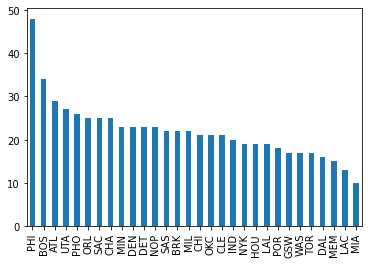

In [37]:
df['Team'].value_counts().plot.bar()

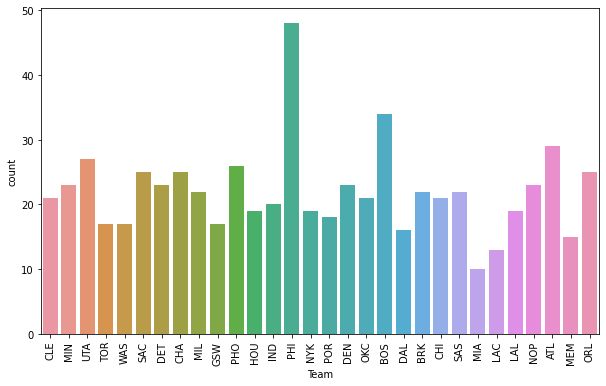

In [35]:
fig,ax=plt.subplots(figsize=(10,6))
sns.countplot(x="Team",data=df)
plt.xticks(rotation=90);

In [46]:
df.loc[:,["Player","3P%"]]

,Player,3P%
0,Kyrie Irving,391.0
1,Derrick Williams,0.3
2,Enes Freedom,289.0
3,Tristan Thompson,278.0
4,Jonas Valančiūnas,366.0
...,...,...
655,Scottie Lewis,NaN
656,Balša Koprivica,NaN
657,Jericho Sims,NaN
658,RaiQuan Gray,NaN


In [71]:
df.loc[:,["Player","3P%"]].sort_values("3P%",ascending=False).head()


,Player,3P%
308,Jakob Poeltl,667.0
598,Jalen Harris,472.0
160,Jamaal Franklin,462.0
592,Cassius Winston,455.0
561,Zeke Nnaji,452.0


In [64]:
df.loc[:,["Player","3P%"]].sort_values("3P%",ascending=False).values[:5]

array([['Jakob Poeltl', 667.0],
       ['Jalen Harris', 472.0],
       ['Jamaal Franklin', 462.0],
       ['Cassius Winston', 455.0],
       ['Zeke Nnaji', 452.0]], dtype=object)

In [59]:
df.loc[:,["Player","3P%"]].sort_values("3P%",ascending=False).sum()

Player    Jakob PoeltlJalen HarrisJamaal FranklinCassius...
3P%                                                141100.3
dtype: object

In [82]:
df.loc[:,["Player",'Total_Points','Total_Minutes']]

,Player,Total_Points,Total_Minutes
0,Kyrie Irving,13631.0,20220.0
1,Derrick Williams,3809.0,8864.0
2,Enes Freedom,8349.0,16101.0
3,Tristan Thompson,6462.0,19180.0
4,Jonas Valančiūnas,8958.0,17559.0
...,...,...,...
655,Scottie Lewis,1.0,7.0
656,Balša Koprivica,NaN,NaN
657,Jericho Sims,19.0,117.0
658,RaiQuan Gray,NaN,NaN


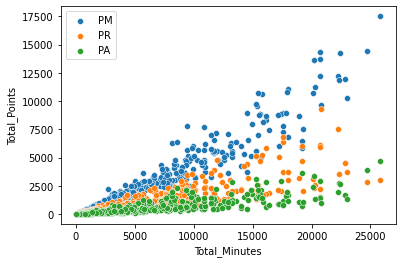

In [92]:
sns.scatterplot(x='Total_Minutes', y='Total_Points', data=df,label="PM")
sns.scatterplot(x='Total_Minutes', y='Total_Rebounds', data=df,label="PR")
sns.scatterplot(x='Total_Minutes', y='Total_Assist', data=df,label="PA")
plt.legend();

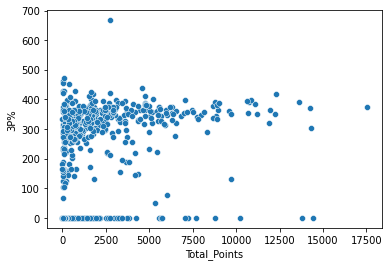

In [93]:
sns.scatterplot(x='Total_Points', y="3P%", data=df)